In [1]:
#data wrangling imports
import pandas as pd
import numpy as np

#vizualizations 
import matplotlib.pyplot as plt
import seaborn as sns

#stats
from scipy import stats
import wrangle as w
import explore as e

In [2]:
# clean df
df = w.clean_df()
df.head()

,entity_name,state,entity_type,number_affected,date,breach_type,location,business_associate_present,month,year,day,multi_breached_location,season,spring,summer,winter,business_associate,day_number
0,"Brightline, Inc.",CA,Business Associate,8432,2023-05-26,Hacking/IT Incident,Network Server,Yes,5,2023,Friday,0,Spring,1,0,0,1,5
1,Iowa Department of Health and Human Services,IA,Health Plan,833,2023-05-26,Unauthorized Access/Disclosure,Paper/Films,Yes,5,2023,Friday,0,Spring,1,0,0,1,5
2,Lancaster Orthopedic Group,PA,Healthcare Provider,500,2023-05-26,Hacking/IT Incident,Network Server,No,5,2023,Friday,0,Spring,1,0,0,0,5
3,Harvard Pilgrim Health Care,MA,Health Plan,2550922,2023-05-24,Hacking/IT Incident,Network Server,No,5,2023,Wednesday,0,Spring,1,0,0,0,3
4,"UI Community Home Care, a subsidiary of Univer...",IA,Healthcare Provider,67897,2023-05-24,Hacking/IT Incident,"Electronic Medical Record, Network Server",No,5,2023,Wednesday,1,Spring,1,0,0,0,3


What Is a “Business Associate?” A “business associate” is a person or entity that performs certain functions or activities that involve the use or disclosure of protected health information on behalf of, or provides services to, a covered entity. A member of the covered entity's workforce is not a business associate.

In [3]:
# split data
train, validate, test = w.split_data(df)

In [4]:
train.entity_name.dtype == 'O'

True

# univariant

In [5]:
col_cat = []  # This is for categorical variables
col_num = []  # This is for numeric variables

for col in train.columns:
    print(col)
    if train.dtypes[col] == 'object':
        col_cat.append(col)
    else:
        if train[col].nunique() < 4:  # Making anything with less than 4 unique values a categorical value
            col_cat.append(col)
        else:
            col_num.append(col)

entity_name
state
entity_type
number_affected
date
breach_type
location
business_associate_present
month
year
day
multi_breached_location
season
spring
summer
winter
business_associate
day_number


In [6]:
col_cat

['entity_name',
 'state',
 'entity_type',
 'breach_type',
 'location',
 'business_associate_present',
 'year',
 'day',
 'multi_breached_location',
 'season',
 'spring',
 'summer',
 'winter',
 'business_associate',
 'day_number']

ENTITY_NAME
Brightline, Inc.                                                      6
dormant see master file 489659_ Benefit Plan Administrators, Inc.     4
United Healthcare Services, Inc. Single Affiliated Covered Entity     3
Canon Business Process Services Inc                                   3
Walgreen Co.                                                          3
                                                                     ..
Duncan Regional Hospital, Incorporated                                1
NewYork-Presbyterian Hospital                                         1
Howard Memorial Hospital                                              1
Crossroads Health                                                     1
Vascular Institute of North Texas, PLLC                               1
Name: entity_name, Length: 497, dtype: int64
Brightline, Inc.                                                      0.011561
dormant see master file 489659_ Benefit Plan Administrators, Inc.     0.

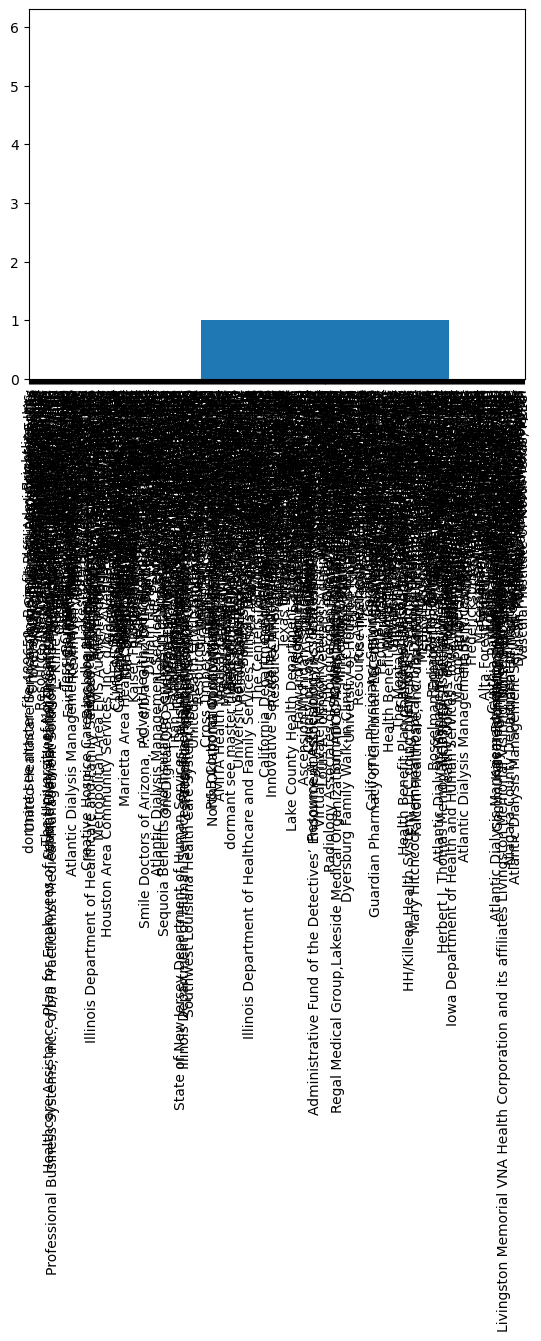


STATE
NY    46
CA    43
TX    40
IL    27
MI    23
FL    22
OH    22
MA    19
PA    18
NJ    18
VA    17
NC    16
IN    15
CT    12
GA    12
MD    11
WA    11
MO    10
KS    10
CO     8
NH     8
MN     7
IA     7
TN     7
OR     7
WI     7
WV     6
AL     6
UT     6
OK     6
NM     5
AZ     5
NE     5
KY     4
AR     4
SC     3
HI     3
NV     2
ME     2
PR     2
RI     2
ND     2
SD     2
DE     2
MT     2
VT     1
MS     1
DC     1
ID     1
WY     1
AK     1
LA     1
Name: state, dtype: int64
NY    0.088632
CA    0.082852
TX    0.077071
IL    0.052023
MI    0.044316
FL    0.042389
OH    0.042389
MA    0.036609
PA    0.034682
NJ    0.034682
VA    0.032755
NC    0.030829
IN    0.028902
CT    0.023121
GA    0.023121
MD    0.021195
WA    0.021195
MO    0.019268
KS    0.019268
CO    0.015414
NH    0.015414
MN    0.013487
IA    0.013487
TN    0.013487
OR    0.013487
WI    0.013487
WV    0.011561
AL    0.011561
UT    0.011561
OK    0.011561
NM    0.009634
AZ    0.009634
NE    0.009634
KY  

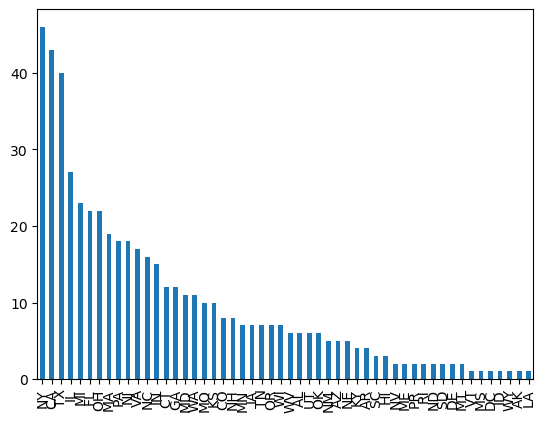


ENTITY_TYPE
Healthcare Provider    346
Business Associate     107
Health Plan             66
Name: entity_type, dtype: int64
Healthcare Provider    0.666667
Business Associate     0.206166
Health Plan            0.127168
Name: entity_type, dtype: float64


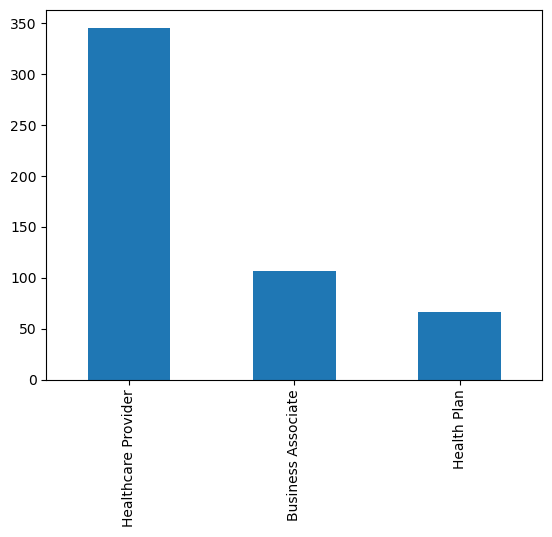


BREACH_TYPE
Hacking/IT Incident               404
Unauthorized Access/Disclosure     92
Theft                              14
Loss                                5
Improper Disposal                   4
Name: breach_type, dtype: int64
Hacking/IT Incident               0.778420
Unauthorized Access/Disclosure    0.177264
Theft                             0.026975
Loss                              0.009634
Improper Disposal                 0.007707
Name: breach_type, dtype: float64


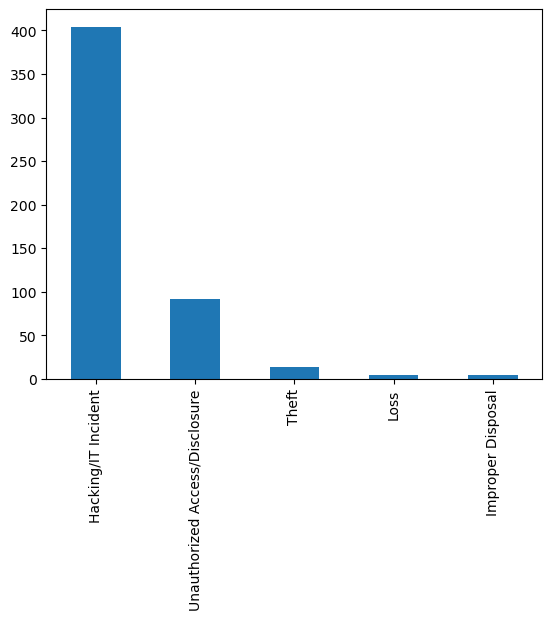


LOCATION
Network Server                                                                                                        315
Email                                                                                                                 116
Paper/Films                                                                                                            25
Electronic Medical Record                                                                                              21
Other Portable Electronic Device                                                                                        7
Other                                                                                                                   6
Laptop                                                                                                                  5
Electronic Medical Record, Network Server                                                                               5
Desktop Comput

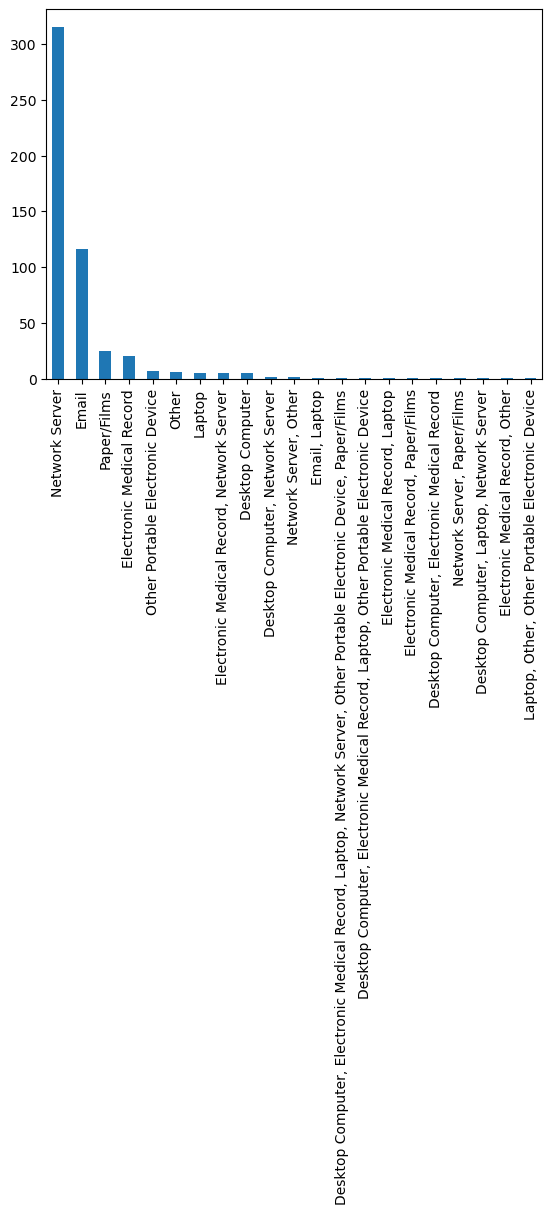


BUSINESS_ASSOCIATE_PRESENT
No     365
Yes    154
Name: business_associate_present, dtype: int64
No     0.703276
Yes    0.296724
Name: business_associate_present, dtype: float64


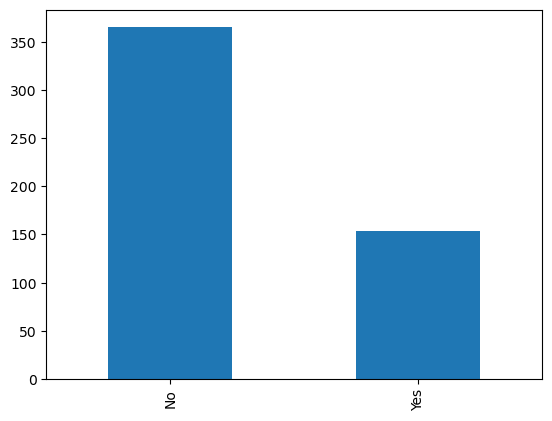


YEAR
2022    295
2023    144
2021     80
Name: year, dtype: int64
2022    0.568401
2023    0.277457
2021    0.154143
Name: year, dtype: float64


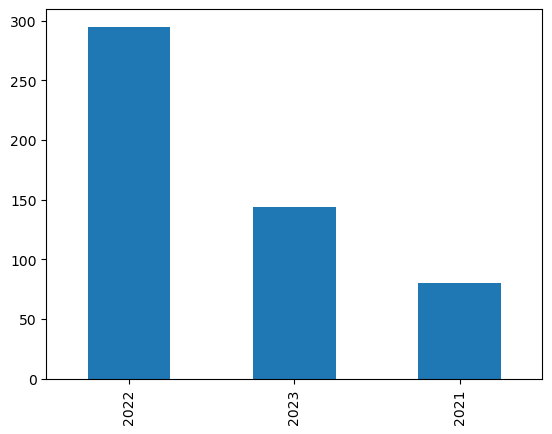


DAY
Friday       198
Wednesday     86
Thursday      80
Monday        75
Tuesday       68
Saturday      10
Sunday         2
Name: day, dtype: int64
Friday       0.381503
Wednesday    0.165703
Thursday     0.154143
Monday       0.144509
Tuesday      0.131021
Saturday     0.019268
Sunday       0.003854
Name: day, dtype: float64


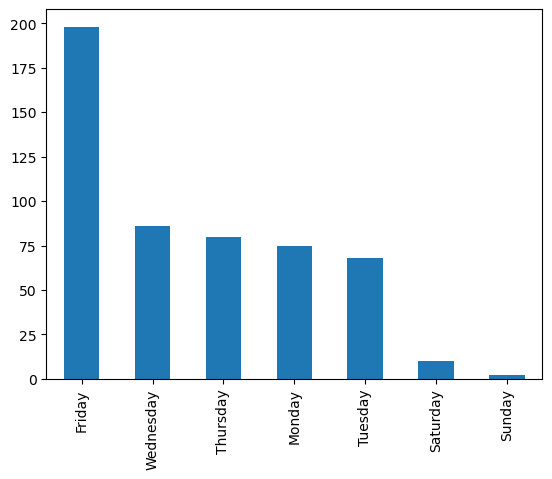


MULTI_BREACHED_LOCATION
0    500
1     19
Name: multi_breached_location, dtype: int64
0    0.963391
1    0.036609
Name: multi_breached_location, dtype: float64


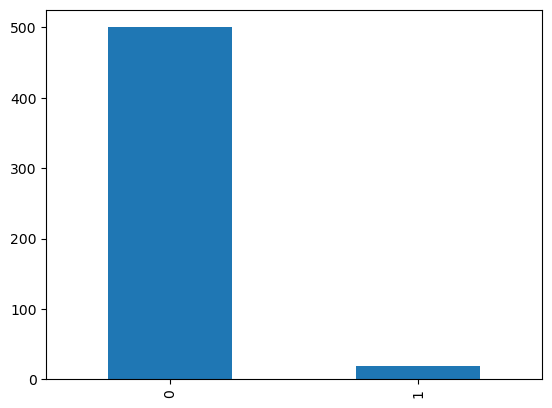


SEASON
Spring    164
Autumn    128
Winter    127
Summer    100
Name: season, dtype: int64
Spring    0.315992
Autumn    0.246628
Winter    0.244701
Summer    0.192678
Name: season, dtype: float64


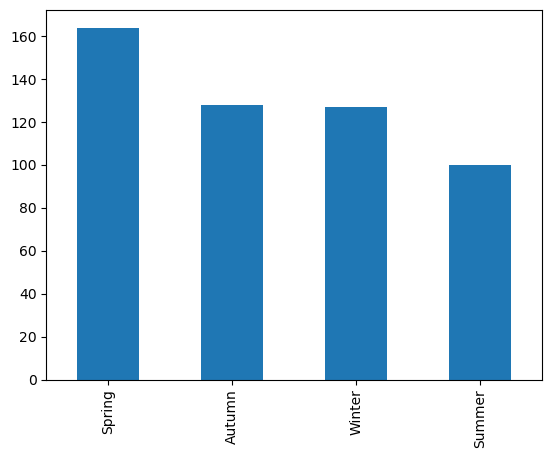


SPRING
0    355
1    164
Name: spring, dtype: int64
0    0.684008
1    0.315992
Name: spring, dtype: float64


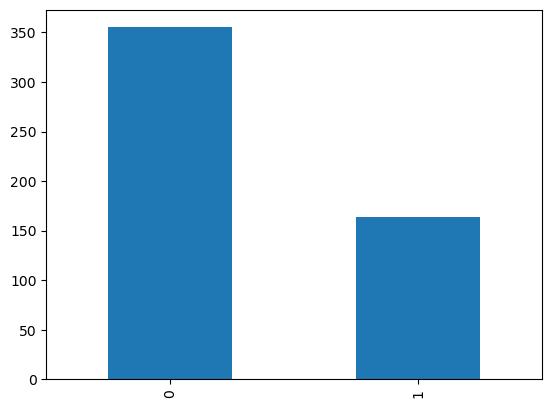


SUMMER
0    419
1    100
Name: summer, dtype: int64
0    0.807322
1    0.192678
Name: summer, dtype: float64


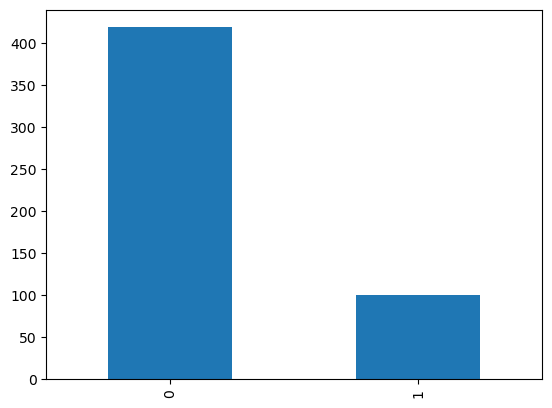


WINTER
0    392
1    127
Name: winter, dtype: int64
0    0.755299
1    0.244701
Name: winter, dtype: float64


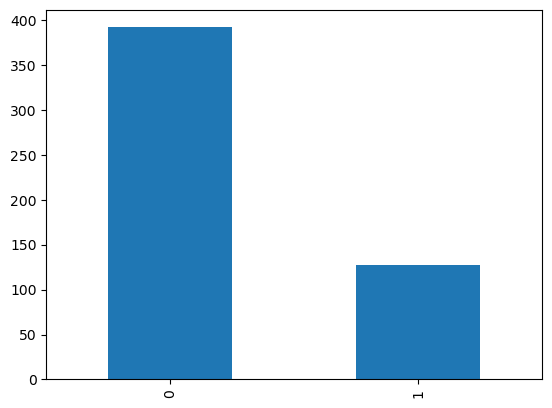


BUSINESS_ASSOCIATE
0    365
1    154
Name: business_associate, dtype: int64
0    0.703276
1    0.296724
Name: business_associate, dtype: float64


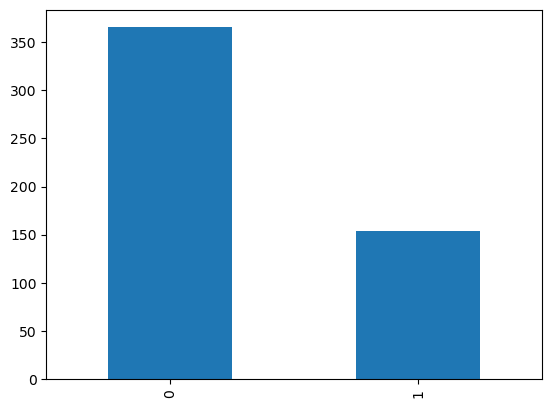


DAY_NUMBER
5    198
3     86
4     80
1     75
2     68
6     10
0      2
Name: day_number, dtype: int64
5    0.381503
3    0.165703
4    0.154143
1    0.144509
2    0.131021
6    0.019268
0    0.003854
Name: day_number, dtype: float64


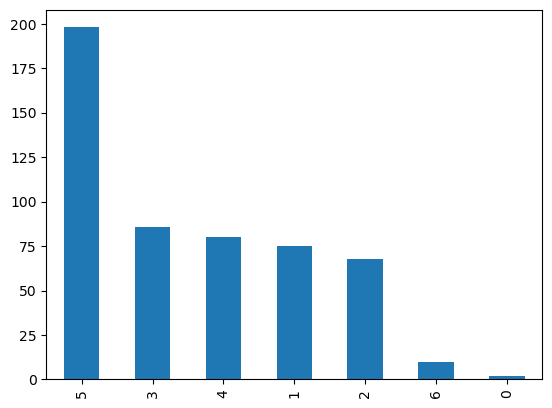

In [7]:
# not many category 
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()

NUMBER_AFFECTED
500      15
501       9
2000      3
1308      2
1116      2
         ..
4133      1
86379     1
54396     1
53668     1
5853      1
Name: number_affected, Length: 480, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


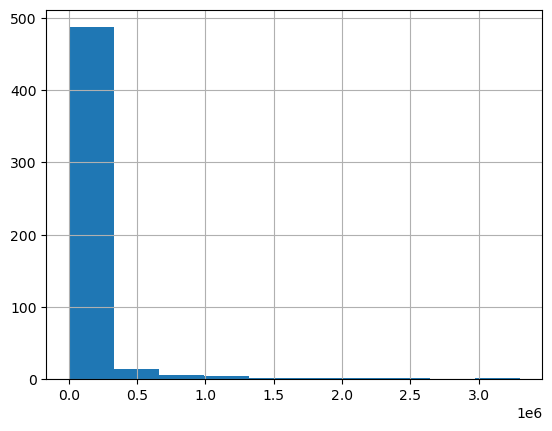

DATE
2022-09-23    11
2022-10-14     9
2023-03-22     8
2022-10-31     7
2022-09-09     6
              ..
2021-10-15     1
2022-08-03     1
2021-09-24     1
2021-07-12     1
2021-07-30     1
Name: date, Length: 291, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


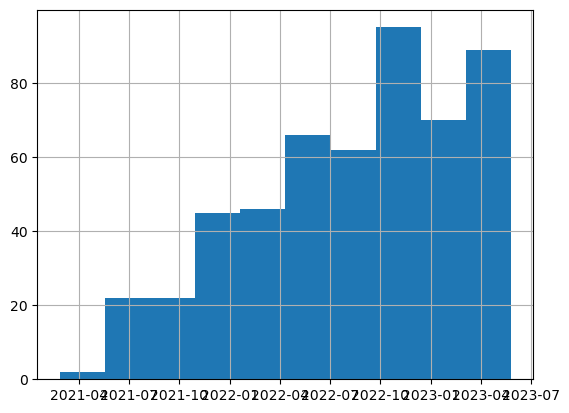

MONTH
5     60
3     53
4     51
10    50
1     44
2     42
11    42
12    41
7     40
9     36
8     36
6     24
Name: month, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


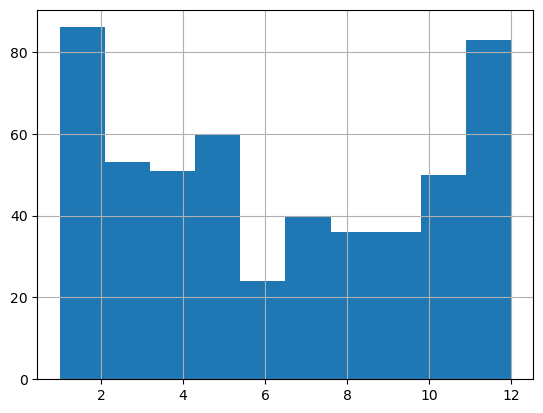

In [8]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()

In [9]:
def train_heat(train):
    '''
    Creates a heatmap of the variables within the zillow dataset
    '''

    # Increase the figure size to accommodate the heatmap
    plt.figure(figsize=(10, 8))
    # Correlation heat map
    sns.heatmap(train.corr(method='pearson'), cmap='YlGnBu', annot=True, fmt=".2f",
                mask=np.triu(train.corr(method='pearson')))
    # Adjust the font size of the annotations
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    # Show the plot
    
    plt.show()

In [10]:
train.number_affected.sum() / train.shape[0]

93176.04624277457

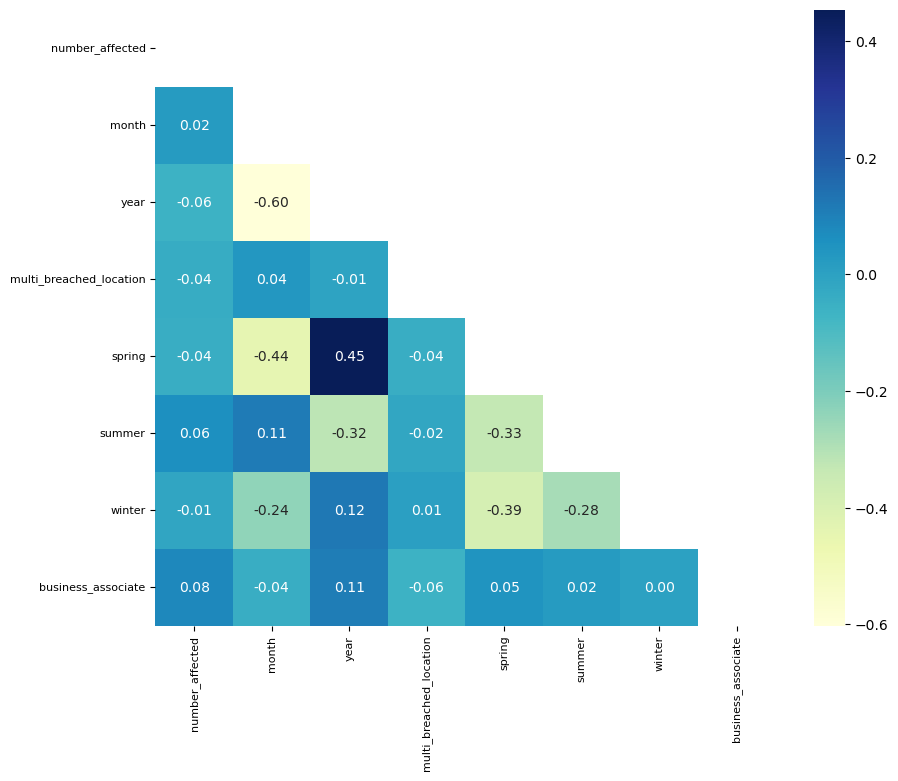

In [11]:
train_heat(train)

* Takeaways:
    - breach submission date has a tail to the left
    - tail to the right for individuals affected
    - less business associates 
    - location of breach information tails to the right --  same with State and entity type no normal dist
    - network servers has they most breach types 
    - hacking IT breaches are most types 
    - healthcare providers are more common 
    - more breaches in the spring and less in the winter

In [12]:
# classification - breach

In [13]:
# hypothesis: drivers of breach_type -- state, individuals affected, entity_type, season, location, mulit-breach location

In [14]:
def cross_function(train, target_variable, feature_variable, alpha=0.05):
    '''
    This function will take the train, target_variable, feature_variable, null_hypothesis, alternative_hypothesis, alpha=0.05
    and print the results and the p-value
    '''
    observed = pd.crosstab(train[target_variable], train[feature_variable])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        print(f'''Reject the null hypothesis: Sufficient''')
    else:
        print(f''' Fail to reject the null: Insufficient evidence''')
    print(f" chi^2 = {chi2} p = {p}")

# Is Breach Type related to the Entity type of the Incident?
$H_0$: Are Entity Type independent of Breach Type

$H_a$: Are Entity Type dependent of Breach Type

In [15]:
cross_function(train, "entity_type", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 13.92477183734511 p = 0.08374740554514155


**Fail to reject null**

# Is Season related to the Breach type of the Incident?
$H_0$: Season independent of Breach Type


$H_a$: Season dependent of Breach Type

In [16]:
cross_function(train, "season", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 13.525811971642984 p = 0.33200735914606166


**Fail to reject null**

# Is Location related to the Breach type of the Incident?
$H_0$: Location independent of Breach Type


$H_a$: Location dependent of Breach Type

In [17]:
cross_function(train, "location", "breach_type")

Reject the null hypothesis: Sufficient
 chi^2 = 562.1609370519833 p = 1.5406332787858717e-73


**Reject Null, enough evidence**

# Is Multi_breach location related to the Breach type of the Incident?
$H_0$: Multi_breach Location independent of Breach Type


$H_a$: Multi_breach Location dependent of Breach Type

In [18]:
cross_function(train, "multi_breached_location", "breach_type")

Reject the null hypothesis: Sufficient
 chi^2 = 16.6186619098327 p = 0.0022920383932938907


**Reject Null, enough evidence**

# Is Breach Type related to the State of the Incident?
$H_0$: Are States independent of Breach Type

$H_a$: Are States dependent of Breach Type

In [19]:
cross_function(train, "breach_type", "state")

Reject the null hypothesis: Sufficient
 chi^2 = 358.21239323300324 p = 1.4410540359924828e-10


**There is some relationship**

# Is Bussiness Associate Present related  to the Breach type of the Incident?
$H_0$: Are Bussiness Associate Present independent of Breach Type

$H_a$: Are Bussiness Associate Present dependent of Breach Type

In [22]:
cross_function(train, "business_associate", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 8.573100969101905 p = 0.07270213455773493


**Faill to reject null** 

# Is Summer related  to the Breach type of the Incident?
$H_0$: Summer independent of Breach Type

$H_a$: Summer Present dependent of Breach Type

In [65]:
cross_function(train, "summer", "breach_type")

Reject the null hypothesis: Sufficient
 chi^2 = 9.644965806953664 p = 0.04685225603676333


**Rejected Null Hypothesis move forward** 

# Is Month related  to the Breach type of the Incident?
$H_0$: Month independent of Breach Type

$H_a$: Month Present dependent of Breach Type

In [26]:
cross_function(train, "month", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 39.48832942183586 p = 0.6651924087798278


**Faill to reject null** 

# Is Day related  to the Breach type of the Incident?
$H_0$: Day independent of Breach Type

$H_a$: Day Present dependent of Breach Type

In [36]:
cross_function(train, "day", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 29.51355655555583 p = 0.20140044496838544


**Faill to reject null** 

# Is Winter related  to the Breach type of the Incident?
$H_0$: Winter independent of Breach Type

$H_a$: Winter Present dependent of Breach Type

In [25]:
cross_function(train, "winter", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 3.495638773485838 p = 0.47854178836737926


**Faill to reject null**

In [55]:
def man_test(samp1, samp2, alpha=0.05):
    '''
    Completes an sample t-test, based on the null hypothesis less than
    '''
    t, p = stats.mannwhitneyu(hack_sample, non_hack_sample)

    if p/2 < alpha and t > 0 :
        print(f'''Reject the null hypothesis: Sufficient''')
    else:
        print(f''' Fail to reject the null: Insufficient evidence''')
    print(f" p-value: {p} , t: {t}")


In [ ]:
# Network server might be somthing to look into later

# i believed hacking breach types occur more individuals affected than non-hacking/IT incidents breaches

$H_0$: Mean of individuals affected of hacking/IT incidents <= Mean of individuals affected of non-hacking/IT incidents breaches

$H_a$: Mean of individuals affected of hacking/IT incidents > Mean of individuals affected of non-hacking/IT incidents breaches

In [47]:
hack_sample = train[train.breach_type == 'Hacking/IT Incident'].number_affected
non_hack_sample = train[train.breach_type != 'Hacking/IT Incident'].number_affected

In [52]:
stats.levene(hack_sample, non_hack_sample)

LeveneResult(statistic=1.6999605269838727, pvalue=0.19287337481405947)

In [56]:
man_test(hack_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


** Reject the NUll**

# Does the number of affected individuals greater in Theft

$H_0$: Mean of individuals affected of Theft incidents <= Mean of individuals affected of non-hacking/IT incidents breaches

$H_a$: Mean of individuals affected of hacking/IT incidents > Mean of individuals affected of non-hacking/IT incidents breaches

In [66]:
train.breach_type.unique()

array(['Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft',
       'Improper Disposal', 'Loss'], dtype=object)

In [71]:
theft_sample = train[train.breach_type == 'Theft'].number_affected
overall_mean = train.number_affected.mean()
man_test(theft_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


In [77]:
theft_sample = train[train.breach_type == 'Unauthorized Access/Disclosure'].number_affected
overall_mean = train.number_affected.mean()
man_test(theft_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


In [78]:
loss_sample = train[train.breach_type == 'Loss'].number_affected
overall_mean = train.number_affected.mean()
man_test(loss_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


In [81]:
theft_sample = train[train.breach_type == 'Improper Disposal'].number_affected
overall_mean = train[train.breach_type != 'Improper Disposal'].number_affected
man_test(theft_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


In [68]:
stats.levene(theft_sample, non_hack_sample)

LeveneResult(statistic=0.2637803598429368, pvalue=0.6084271930065935)

In [69]:
man_test(theft_sample, non_hack_sample)

Reject the null hypothesis: Sufficient
 p-value: 4.743847990193704e-06 , t: 29723.0


# features moving to modeling
Location, mulit-breach location, state, summer, individuals